In [3]:
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [4]:
cd /content/gdrive/MyDrive/Sentiment Analysis Project


/content/gdrive/MyDrive/Sentiment Analysis Project


In [5]:
import pandas as pd
import numpy as np

In [6]:

tw = pd.read_csv("tweets.csv")

In [7]:
tw.drop(["id"],axis = 1)

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,0,Finally a transparant silicon case ^^ Thanks t...
2,0,We love this! Would you go? #talk #makememorie...
3,0,I'm wired I know I'm George I was made that wa...
4,1,What amazing service! Apple won't even talk to...
...,...,...
7915,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,0,We would like to wish you an amazing day! Make...
7917,0,Helping my lovely 90 year old neighbor with he...
7918,0,Finally got my #smart #pocket #wifi stay conne...


In [8]:
tw['label'].value_counts()

0    5894
1    2026
Name: label, dtype: int64

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
nltk_stopwords = set(stopwords.words('english'))
sklearn_stopwords = set(ENGLISH_STOP_WORDS)

In [11]:
combined_stopwords = nltk_stopwords.intersection(sklearn_stopwords)

In [12]:
len(combined_stopwords)

119

In [13]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
lemmatizer.lemmatize("groups")

'group'

In [15]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.2 MB/s eta 0:00:00


In [16]:
import contractions

In [17]:
contractions.fix("she's busy")

'she is busy'

In [18]:
def tweet_cleaner_without_stopwords(text):
    new_text = re.sub(r"'s\\b", " is", text)
    new_text = new_text.lower().strip()
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)  
     
    
    new_text = new_text.strip()
  
    #may add spell check!
    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [19]:
l1= tw['tweet'].apply(lambda x:tweet_cleaner_without_stopwords(x))

In [20]:
tw['cleaned_tweets_w/o_SW'] = l1

In [21]:
tw

,id,label,tweet,cleaned_tweets_w/o_SW
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test http goo gl h mfqv ...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case thanks to m...
2,3,0,We love this! Would you go? #talk #makememorie...,we love this would you go talk makememories un...
3,4,0,I'm wired I know I'm George I was made that wa...,i am wired i know i am george i wa made that w...
4,5,1,What amazing service! Apple won't even talk to...,what amazing service apple will not even talk ...
...,...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...,live out loud lol liveoutloud selfie smile son...
7916,7917,0,We would like to wish you an amazing day! Make...,we would like to wish you an amazing day make ...
7917,7918,0,Helping my lovely 90 year old neighbor with he...,helping my lovely year old neighbor with her i...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...,finally got my smart pocket wifi stay connecte...


In [22]:
def tweet_cleaner_with_stopwords(text):
    new_text = re.sub(r"'s\\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\\S+", "", new_text)
    new_text = re.sub("http", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
#domain specific stpword removal
    new_text = re.sub("com", " ", new_text) 
    new_text = re.sub("www", "", new_text) 
    new_text = new_text.lower().strip()
    
    new_text = [token for token in new_text.split() if token not in combined_stopwords]
    
    new_text = [token for token in new_text if len(token)>2]
    
    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text


In [23]:
tw['cleaned_tweets_with_SW'] = tw['tweet'].apply(tweet_cleaner_with_stopwords)

In [24]:
tw

,id,label,tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test http goo gl h mfqv ...,fingerprint pregnancy test goo mfqv android ap...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case thanks to m...,finally transparant silicon case thanks uncle ...
2,3,0,We love this! Would you go? #talk #makememorie...,we love this would you go talk makememories un...,love would talk makememories unplug relax ipho...
3,4,0,I'm wired I know I'm George I was made that wa...,i am wired i know i am george i wa made that w...,wired know george made way iphone cute daventr...
4,5,1,What amazing service! Apple won't even talk to...,what amazing service apple will not even talk ...,amazing service apple even talk question unles...
...,...,...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...,live out loud lol liveoutloud selfie smile son...,live loud lol liveoutloud selfie smile sony mu...
7916,7917,0,We would like to wish you an amazing day! Make...,we would like to wish you an amazing day make ...,would like wish amazing day make every minute ...
7917,7918,0,Helping my lovely 90 year old neighbor with he...,helping my lovely year old neighbor with her i...,helping lovely year old neighbor ipad morning ...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...,finally got my smart pocket wifi stay connecte...,finally got smart pocket wifi stay connected a...


In [25]:
tw.nunique()

id                        7920
label                        2
tweet                     7918
cleaned_tweets_w/o_SW     7785
cleaned_tweets_with_SW    7661
dtype: int64

In [26]:
all_words = []
for t in tw['tweet']:
    all_words.extend(t.split())
   

In [27]:
len(set(all_words))

34348

In [28]:
import matplotlib.pyplot as plt

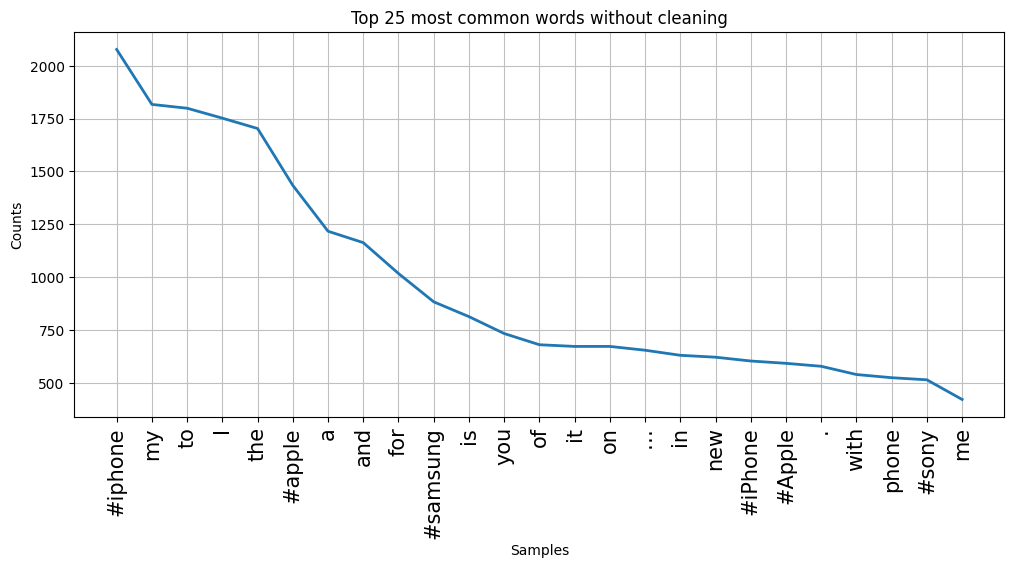

In [29]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words without cleaning')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [30]:
all_words = []
for t in tw['cleaned_tweets_w/o_SW']:
    all_words.extend(t.split())
len(set(all_words))


20946

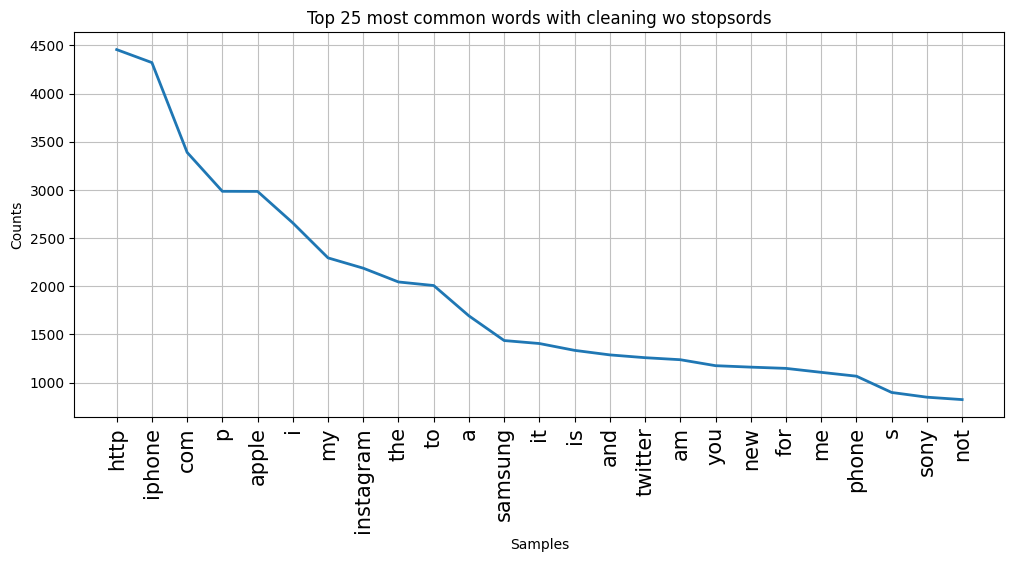

In [31]:
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words with cleaning wo stopsords')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

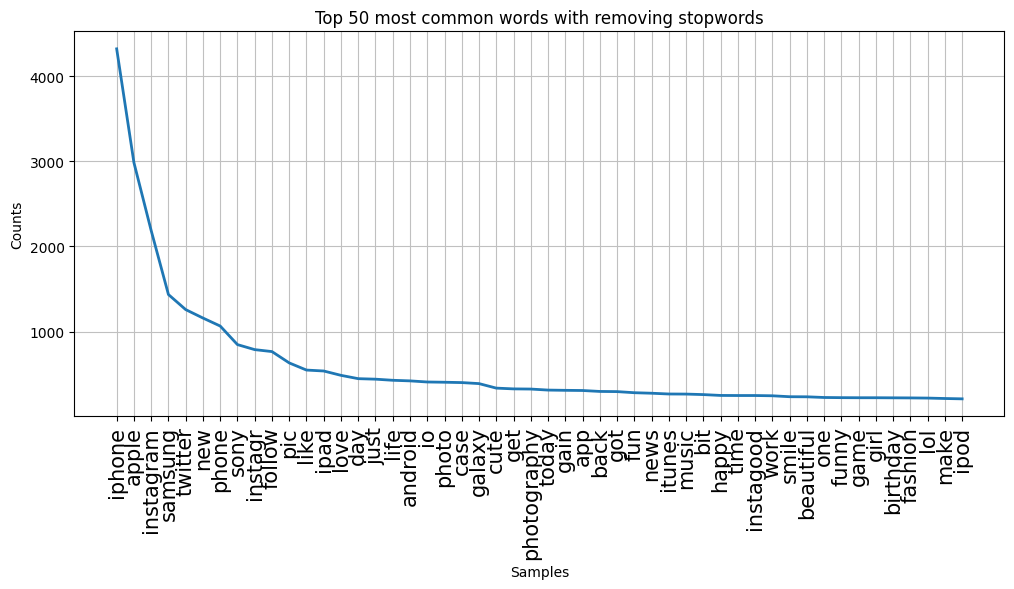

In [32]:


all_words = []
for t in tw['cleaned_tweets_with_SW']:
    all_words.extend(t.split())



# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 50 most common words with removing stopwords')
plt.xticks(fontsize=15)

freq_dist.plot(50, cumulative=False)

plt.show()



In [33]:
len(set(all_words))

20237

In [34]:
tw.shape

(7920, 5)

In [35]:
##using countvectorizer and then TF-IDF vectorizer 

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()
CV_features = CV.fit_transform(tw['cleaned_tweets_w/o_SW'])

In [37]:
CV_features.shape

(7920, 20920)

In [38]:
CVdf = pd.DataFrame(CV_features.todense() )
CVdf

,0,1,2,3,4,5,6,7,8,9,...,20910,20911,20912,20913,20914,20915,20916,20917,20918,20919
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
np.count_nonzero(CVdf)/CVdf.size

0.0008262778357185623

In [40]:
print(CV.get_feature_names_out()[:50]) 

['aa' 'aaaahhhhhhh' 'aab' 'aag' 'aagrlngjti' 'aah' 'aalborg' 'aand' 'aapl'
 'aaql' 'aaqnomy' 'aarhus' 'aaron' 'aarp' 'aarrrggghhhh' 'aashamsakal'
 'aauicnsn' 'aaumhs' 'aauzrs' 'aaydojbfkq' 'aayp' 'aaz' 'ab' 'abah'
 'abareta' 'abay' 'abb' 'abc' 'abdou' 'abdysg' 'abe' 'abensonph' 'aber'
 'abercrombie' 'abi' 'ability' 'abit' 'abkwryzixi' 'able' 'ableton'
 'abnqum' 'abo' 'aboard' 'about' 'aboutalook' 'aboutdamntime' 'abouttime'
 'abouttonight' 'above' 'abozsj']


In [41]:
len(CV.get_feature_names_out())


20920

In [42]:
CV.inverse_transform(np.asarray(CV_features[10].todense()))  # actual words in the 10th tweet


[array(['apple', 'color', 'crash', 'do', 'every', 'five', 'fuckin', 'hey',
        'inch', 'ipod', 'it', 'make', 'minite', 'new', 'not', 'or',
        'thinner', 'when', 'you'], dtype='<U46')]

In [43]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CV_features, tw['label'], test_size=0.25, stratify=tw['label'], random_state=42)

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)

print(LR.score(X_train, y_train))  # train score)
print(LR.score(X_test, y_test))   # test score)  



0.9813131313131314
0.8858585858585859


In [44]:
## L1-REGULARIZATION
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.6)
LR1.fit(X_train, y_train)

print(LR1.score(X_train, y_train))  # train score)
print(LR1.score(X_test, y_test))   # test score)      

0.9131313131313131
0.8909090909090909


In [45]:
## Cross-Validate 
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold

In [46]:
X = CV_features
y = tw['label']

In [47]:
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(LR1, X, y, cv=kfold, scoring='accuracy')
print(results)
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

[0.88699495 0.88257576 0.88573232 0.89330808 0.89709596]
88.91 0.53


In [48]:


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_validate(LR1, X, y, cv=kfold, scoring='accuracy', return_train_score=True)



In [49]:
results

{'fit_time': array([0.05121589, 0.04314041, 0.04418826, 0.04795098, 0.04493999]),
 'score_time': array([0.00145817, 0.0014317 , 0.00138974, 0.00143957, 0.00146604]),
 'test_score': array([0.88699495, 0.88257576, 0.88573232, 0.89330808, 0.89709596]),
 'train_score': array([0.90356692, 0.90388258, 0.90309343, 0.90198864, 0.89867424])}

In [50]:
print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

[0.90356692 0.90388258 0.90309343 0.90198864 0.89867424]
90.22 0.19


In [51]:
print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

[0.88699495 0.88257576 0.88573232 0.89330808 0.89709596]
88.91 0.53


In [52]:
## Hyper parameter tuning of the LR1 model
from sklearn.model_selection import GridSearchCV

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1')

C_values = np.arange(0.00001, 1, 0.05) # 20 values

grid = GridSearchCV(estimator=LR1, param_grid={'C': C_values}, cv=kfold, scoring='accuracy', \
                    return_train_score=True, verbose=2, n_jobs=-1)
grid_results = grid.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [53]:
grid_results

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', penalty='l1',
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
       2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
       5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
       7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])},
             return_train_score=True, scoring='accuracy', verbose=2)

In [54]:
grid_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [55]:
grid_results.best_params_, grid_results.best_score_, grid_results.best_index_

({'C': 0.80001}, 0.8910353535353537, 16)

In [56]:
grid_results.cv_results_['mean_test_score'][grid_results.best_index_]*100

89.10353535353536

In [57]:
grid_results.cv_results_['mean_train_score'][grid_results.best_index_]*100

92.34532828282829

In [58]:
grid_results.cv_results_['std_test_score'][grid_results.best_index_]*100

0.5849108495909341

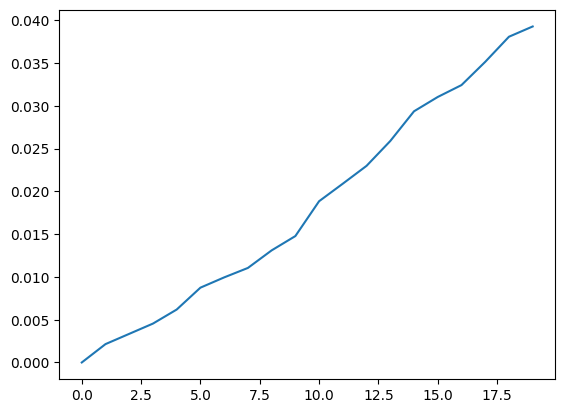

In [59]:
plt.plot(grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score'])

In [60]:
grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score']

array([-1.11022302e-16,  2.14646465e-03,  3.34595960e-03,  4.54545455e-03,
        6.18686869e-03,  8.74368687e-03,  9.94318182e-03,  1.10479798e-02,
        1.30997475e-02,  1.47727273e-02,  1.88446970e-02,  2.08964646e-02,
        2.29797980e-02,  2.58838384e-02,  2.93560606e-02,  3.10290404e-02,
        3.24179293e-02,  3.51325758e-02,  3.80681818e-02,  3.92676768e-02])

In [61]:
grid_results.cv_results_['mean_train_score'][0]

0.7441919191919191

In [62]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = tw['cleaned_tweets_w/o_SW']
y = tw['label']

CV = CountVectorizer()
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

88.91 0.53


In [63]:
CV_pipe.named_steps

{'CV': CountVectorizer(),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [64]:
CV_pipe.fit(X,y)

Pipeline(steps=[('CV', CountVectorizer()),
                ('LR',
                 LogisticRegression(C=0.4, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [65]:
len(CV_pipe['CV'].vocabulary_)

20920

In [66]:
X = tw['cleaned_tweets_w/o_SW']
y = tw['label']

CV = CountVectorizer(stop_words=list(combined_stopwords), min_df=10, max_features=None)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_)

87.99 0.55


1271

In [67]:
X = tw['cleaned_tweets_w/o_SW']
y = tw['label']

CV = CountVectorizer(stop_words=list(combined_stopwords), min_df=10, max_features=300)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_)

87.46 0.53


300

In [68]:
#tf-idf

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = tw['cleaned_tweets_w/o_SW']
y = tw['label']

# we want to include only those words in the vocab which have min df of 5,
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
TFIDF = TfidfVectorizer(stop_words=list(combined_stopwords),  min_df=5, max_features=1000)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('TFIDF', TFIDF) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

TFIDF.fit_transform(X)
len(TFIDF.vocabulary_)  # no. of features AFTER applying the stopwords

87.77 0.25
87.41 0.63


1000

In [70]:
CV_pipe.named_steps

{'TFIDF': TfidfVectorizer(max_features=1000, min_df=5,
                 stop_words=['own', 'once', 'not', 'itself', 'in', 'for', 're',
                             'as', 'how', 'while', 'by', 'because', 'with',
                             'there', 'been', 'only', 'where', 'were', 'any',
                             'during', 'to', 'this', 'has', 'an', 'that', 'here',
                             'ourselves', 'my', 'our', 'about', ...]),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [71]:
#N-gram

In [72]:


# Unigrams + Bigrams
X = tw['cleaned_tweets_w/o_SW']
y = tw['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!! 
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
CV = CountVectorizer(stop_words=list(combined_stopwords),  ngram_range=(1, 2), min_df=5)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords



89.33 0.17
88.19 0.7


4151

In [73]:


# Unigrams + Bigrams
X = tw['cleaned_tweets_w/o_SW']
y = tw['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!! 
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
CV = CountVectorizer(stop_words=list(combined_stopwords),  ngram_range=(1, 3), min_df=5)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


89.33 0.17
88.21 0.67


5056

In [74]:
tweets_list = list(tw['cleaned_tweets_w/o_SW'].apply(lambda x: x.split()))
tweets_list[0] # list of lists,

['fingerprint',
 'pregnancy',
 'test',
 'http',
 'goo',
 'gl',
 'h',
 'mfqv',
 'android',
 'apps',
 'beautiful',
 'cute',
 'health',
 'igers',
 'iphoneonly',
 'iphonesia',
 'iphone']

In [75]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
# Creating your own Word2Vec Model & Train
from gensim.models import Word2Vec
# train model
#context bag of words models encapsulates the context of words with other words(with "window" left and right of that word) 
cbow_model = Word2Vec(tweets_list, vector_size = 300, window = 3, min_count=5, sg=0)

In [77]:
print(cbow_model)

Word2Vec<vocab=2678, vector_size=300, alpha=0.025>


In [78]:
len(cbow_model.wv.index_to_key)

2678

In [79]:
def document_vector(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
    
    # doc1 contains those words of the document which are included in the vocab
    doc1 = [word for word in doc.split() if word in cbow_model.wv.index_to_key]
    
    wv1 = []  # this will contain the WE of all the vocab words from the doc
    for word in doc1:
        wv1.append(cbow_model.wv.get_vector(word))
    wv1_ = np.array(wv1)
    wv1_mean = wv1_.mean(axis=0)
    return wv1_mean

In [80]:
tweets_temp = tw['cleaned_tweets_w/o_SW'].apply(document_vector)

In [81]:
tweets_temp[:5]

0    [-0.13318114, 0.08590667, 0.15270242, 0.310776...
1    [-0.04050986, 0.22564383, -0.19479464, 0.19197...
2    [0.078786485, 0.28158358, -0.020638281, 0.0765...
3    [0.030887166, 0.35526994, -0.07587693, 0.18319...
4    [0.16240962, 0.3682848, -0.14585492, -0.052034...
Name: cleaned_tweets_w/o_SW, dtype: object

In [82]:
# np.array(tweets_temp).reshape(7920,1).mean(axis=0)

In [83]:
# np.array(tweets_temp).reshape(7920,1)

In [84]:
tweets_temp[0].shape 

(300,)

In [85]:
# Combining all the document vectors into a singl numpy array (tweets_vec)
embedding_size = 300
tweets_vec = np.ones((len(tweets_temp), embedding_size))*np.nan
for i in range(tweets_vec.shape[0]):
    tweets_vec[i,:] = tweets_temp.iloc[i]

tweets_vec.shape 

(7920, 300)

In [86]:
df = pd.DataFrame(tweets_vec)
df['y'] = tw['label']
df.dropna(how='any', axis=0, inplace=True)

In [87]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,y
0,-0.133181,0.085907,0.152702,0.310777,-0.153545,-0.245944,0.066123,0.496353,0.147696,-0.102753,...,0.263447,0.229755,-0.098479,0.296976,0.197900,0.127756,-0.047788,0.165068,0.005684,0
1,-0.040510,0.225644,-0.194795,0.191979,-0.113883,-0.373211,0.041471,0.548472,0.042917,-0.094407,...,0.287288,0.219977,0.028862,0.293057,0.355205,0.105983,0.079702,0.183068,-0.156565,0
2,0.078786,0.281584,-0.020638,0.076588,0.048997,-0.352468,0.115892,0.448218,0.076852,-0.099680,...,0.334162,0.160836,0.094852,0.139937,0.342243,-0.064218,-0.099004,0.115553,-0.128453,0
3,0.030887,0.355270,-0.075877,0.183191,-0.016208,-0.560389,0.074575,0.480326,0.019116,-0.042416,...,0.296212,0.281597,0.127467,0.234908,0.438970,-0.092023,-0.058504,0.168537,-0.134192,0
4,0.162410,0.368285,-0.145855,-0.052034,0.135891,-0.394733,0.170266,0.444060,0.089181,-0.119989,...,0.400233,0.201127,0.206408,0.056373,0.469534,-0.150422,-0.149463,0.093648,-0.151117,1


In [88]:
X_word_emb = df.drop('y', axis=1)
y = df['y']
X_word_emb.shape

(7920, 300)

In [89]:
X_word_emb.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.133181,0.085907,0.152702,0.310777,-0.153545,-0.245944,0.066123,0.496353,0.147696,-0.102753,...,0.044143,0.263447,0.229755,-0.098479,0.296976,0.197900,0.127756,-0.047788,0.165068,0.005684
1,-0.040510,0.225644,-0.194795,0.191979,-0.113883,-0.373211,0.041471,0.548472,0.042917,-0.094407,...,0.050247,0.287288,0.219977,0.028862,0.293057,0.355205,0.105983,0.079702,0.183068,-0.156565
2,0.078786,0.281584,-0.020638,0.076588,0.048997,-0.352468,0.115892,0.448218,0.076852,-0.099680,...,0.063127,0.334162,0.160836,0.094852,0.139937,0.342243,-0.064218,-0.099004,0.115553,-0.128453
3,0.030887,0.355270,-0.075877,0.183191,-0.016208,-0.560389,0.074575,0.480326,0.019116,-0.042416,...,0.207080,0.296212,0.281597,0.127467,0.234908,0.438970,-0.092023,-0.058504,0.168537,-0.134192
4,0.162410,0.368285,-0.145855,-0.052034,0.135891,-0.394733,0.170266,0.444060,0.089181,-0.119989,...,0.084964,0.400233,0.201127,0.206408,0.056373,0.469534,-0.150422,-0.149463,0.093648,-0.151117


In [90]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

In [91]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4, random_state=42)
WE_pipe = Pipeline([('SC', StandardScaler()), ('LR', LR1)] )

results = cross_validate(WE_pipe, X_word_emb, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

86.66 0.22
86.41 0.77


In [92]:
X = tw['cleaned_tweets_w/o_SW']
y = tw['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!! 
# AND SELECT the TOP 300 FEATURES ONLY to build the model
CV = CountVectorizer(min_df=5, max_features=300)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords

89.14 0.12
88.36 0.49


300

In [93]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
# load the converted model    



filename = '/content/gdrive/MyDrive/glove.6B.300d.txt'
gloveModel = load_glove_model('/content/gdrive/MyDrive/glove.6B.300d.txt')
# model = KeyedVectors.load_word2vec_format(filename, binary=False)

Loading Glove Model
400000 words loaded!


In [96]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec(glove_input_file=filename, word2vec_output_file="gensim_glove_vectors.txt")

<ipython-input-96-c950d3269acd>:2: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file=filename, word2vec_output_file="gensim_glove_vectors.txt")


(400000, 300)

In [97]:

from gensim.models.keyedvectors import KeyedVectors
glove_model = KeyedVectors.load_word2vec_format("gensim_glove_vectors.txt", binary=False)

In [118]:
a = glove_model.get_index('woman') 

In [119]:
glove_model.index_to_key[a]

'woman'

In [129]:
def document_vector_GloVe(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
    
    # doc1 contains those words of the document which are included in the vocab
    doc1 = [word for word in doc.split() if word in glove_model.index_to_key]
    
    wv1 = []  # this will contain the WE of all the vocab words from the doc
    for word in doc1:
        wv1.append(glove_model.get_vector(word))
    wv1_ = np.array(wv1)
    wv1_mean = wv1_.mean(axis=0)
    return wv1_mean

In [131]:
tweets_temp = tw['cleaned_tweets_w/o_SW'].apply(document_vector_GloVe)
tweets_temp[:5]  # displaying the 1st 5 tweets, as document vectors
# Combining all the document vectors into a singl numpy array (tweets_vec)
embedding_size = 300
tweets_vec = np.ones((len(tweets_temp), embedding_size))*np.nan
for i in range(tweets_vec.shape[0]):
    tweets_vec[i,:] = tweets_temp.iloc[i]

# tweets_vec.shape # this itself is your final FEATURE MATRIX
# Create a new DF to store these new documnent features
df1 = pd.DataFrame(tweets_vec)
df1['y'] = tw['label']
df1.dropna(how='any', axis=0, inplace=True)

X_word_emb = df1.drop('y', axis=1)
y = df1['y']
X_word_emb.shape

(7920, 300)

In [132]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4, random_state=42)
WE_pipe = Pipeline([('SC', StandardScaler()), ('LR', LR1)] )

results = cross_validate(WE_pipe, X_word_emb, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

89.97 0.1
88.19 0.53
